In [195]:
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from keras.metrics.metrics import mean_squared_error
from math import sqrt

from matplotlib import pyplot as plt


import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings

from math import sqrt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from sklearn.preprocessing import MinMaxScaler


#Initialize the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score

In [196]:
 covid_data = pd.read_csv('covid_19_data.csv')

In [197]:
covid_data.shape


(13850, 8)

In [198]:
covid_data.dtypes


SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [199]:
covid_data.isnull().sum()


SNo                   0
ObservationDate       0
Province/State     6743
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [200]:
covid_data.head(20)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [201]:
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])
covid_data['Last Update'] = pd.to_datetime(covid_data['Last Update'])

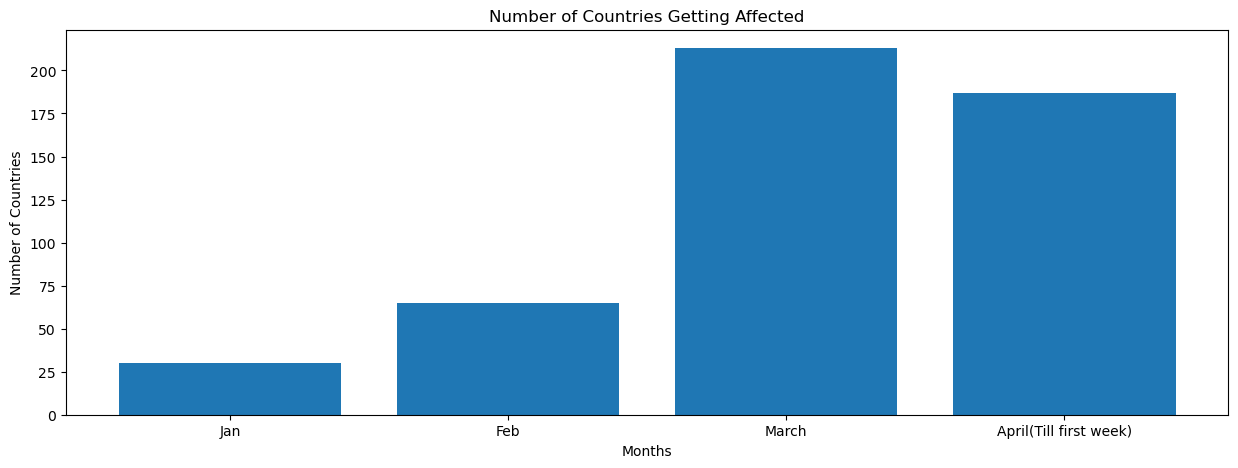

In [202]:
months = ['Jan','Feb','March','April(Till first week)']
countries_affected = []
for x in range(1,5):
    countries_affected.append(covid_data[covid_data['ObservationDate'].dt.month == x]['Country/Region'].nunique())
plt.figure(figsize = (15,5))    
plt.bar(months,countries_affected)    
plt.xlabel('Months')
plt.ylabel("Number of Countries")
plt.title('Number of Countries Getting Affected')
plt.show()

In [203]:
first_month = covid_data[covid_data['ObservationDate'] == '01/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)
second_month = covid_data[covid_data['ObservationDate'] == '02/29/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)
third_month = covid_data[covid_data['ObservationDate'] == '03/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)
fourth_month = covid_data[covid_data['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

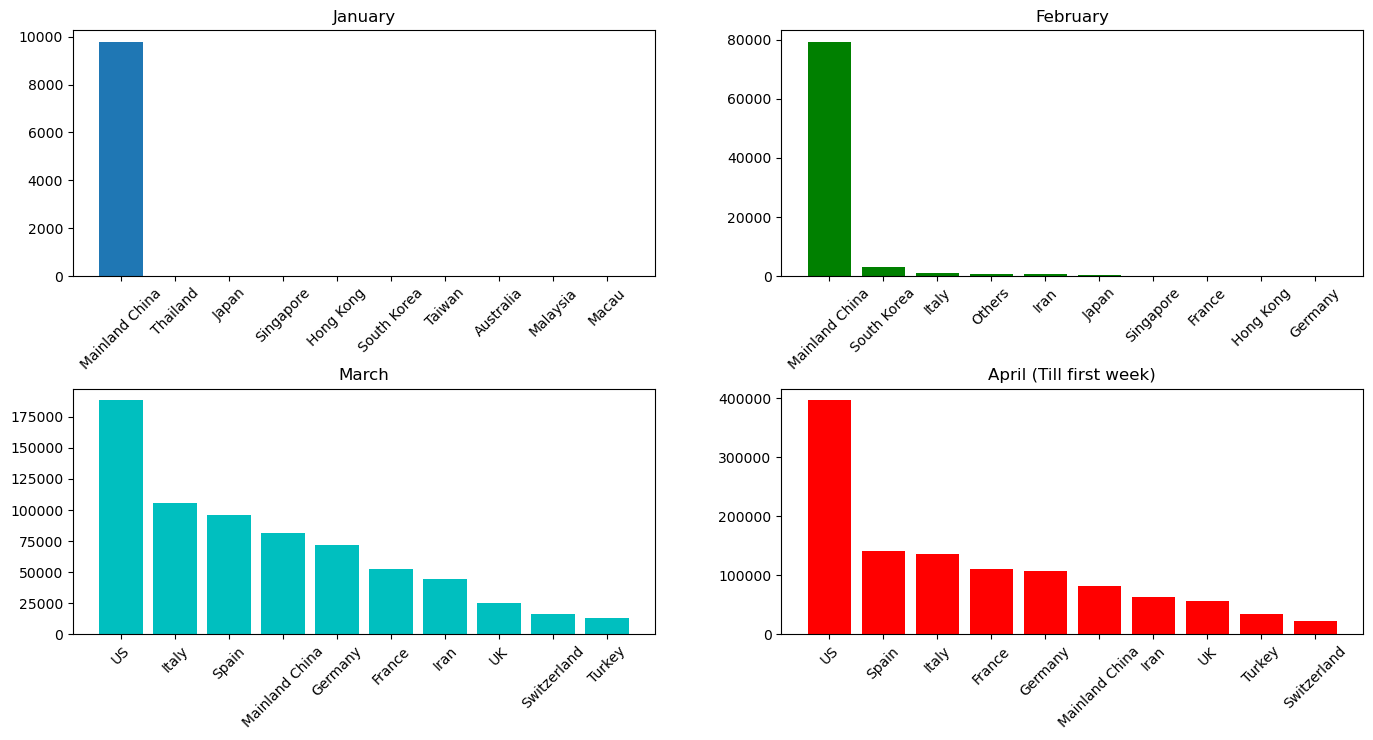

In [204]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
fig.tight_layout(pad=6.0)

ax[0,0].bar(first_month.index.tolist(),first_month.tolist())
ax[0,0].set_xticklabels(first_month.index.tolist(),rotation = 45, minor=False)
ax[0,0].title.set_text('January')

ax[0,1].bar(second_month.index.tolist(),second_month.tolist(), color = 'g')
ax[0,1].set_xticklabels(second_month.index.tolist(),rotation = 45, minor=False)
ax[0,1].title.set_text('February')

ax[1,0].bar(third_month.index.tolist(),third_month.tolist(), color = 'c')
ax[1,0].set_xticklabels(third_month.index.tolist(),rotation = 45, minor=False)
ax[1,0].title.set_text('March')

ax[1,1].bar(fourth_month.index.tolist(),fourth_month.tolist(), color = 'r')
ax[1,1].set_xticklabels(fourth_month.index.tolist(),rotation = 45, minor=False)
ax[1,1].title.set_text('April (Till first week)')

plt.show()

In [205]:
third_month_total = covid_data[covid_data['ObservationDate'] == '03/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)
fourth_month_total = covid_data[covid_data['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)

In [206]:
top_countries = fourth_month.index.tolist()
increase_rate = {}
for x in top_countries:
        increase_rate.update({x:((fourth_month_total[x] - third_month_total[x] )/ third_month_total[x]) * 100})
increase_rate = pd.DataFrame({'Countries':list(increase_rate.keys()), 'Increase Rate': list(increase_rate.values())})
increase_rate = increase_rate.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [207]:
increase_rate


,Countries,Increase Rate
8,Turkey,152.080408
7,UK,119.571445
0,US,110.564271
3,France,108.349897
4,Germany,49.931762
1,Spain,47.974938
6,Iran,40.318350
9,Switzerland,34.013851
2,Italy,28.162810
5,Mainland China,0.263726


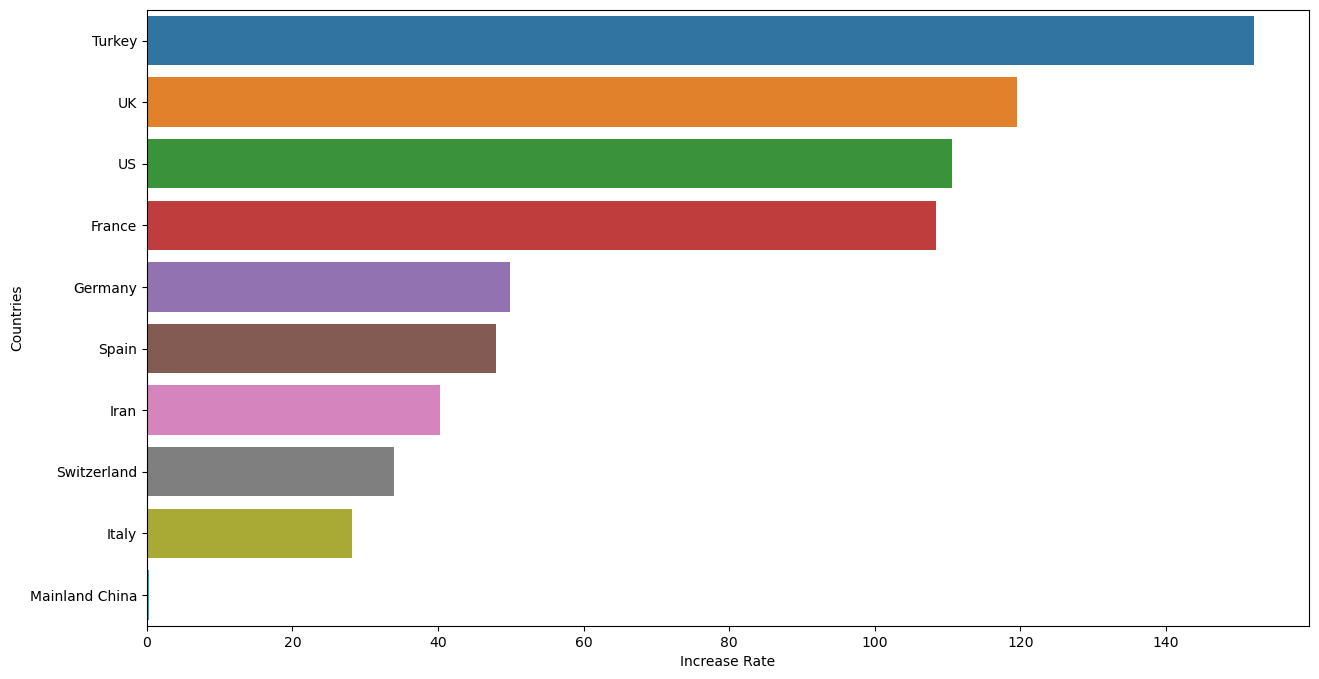

In [208]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate)
plt.show()

In [209]:
countries_overall = covid_data['Country/Region'].tolist()
increase_rate_overall = {}
for x in countries_overall:
    if (x not in third_month_total or x not in fourth_month_total):
        continue;
    else:
        increase_rate_overall.update({x:((fourth_month_total[x] - third_month_total[x] )/ third_month_total[x]) * 100})
increase_rate_overall = pd.DataFrame({'Countries':list(increase_rate_overall.keys()), 'Increase Rate': list(increase_rate_overall.values())})
increase_rate_overall = increase_rate_overall.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [210]:
increase_rate_overall


,Countries,Increase Rate
157,Niger,929.629630
132,Saint Vincent and the Grenadines,700.000000
117,Guinea,554.545455
181,Sierra Leone,500.000000
55,Belarus,466.447368
140,Liberia,366.666667
178,MS Zaandam,350.000000
173,Guinea-Bissau,312.500000
25,India,280.171797
24,United Arab Emirates,255.271084


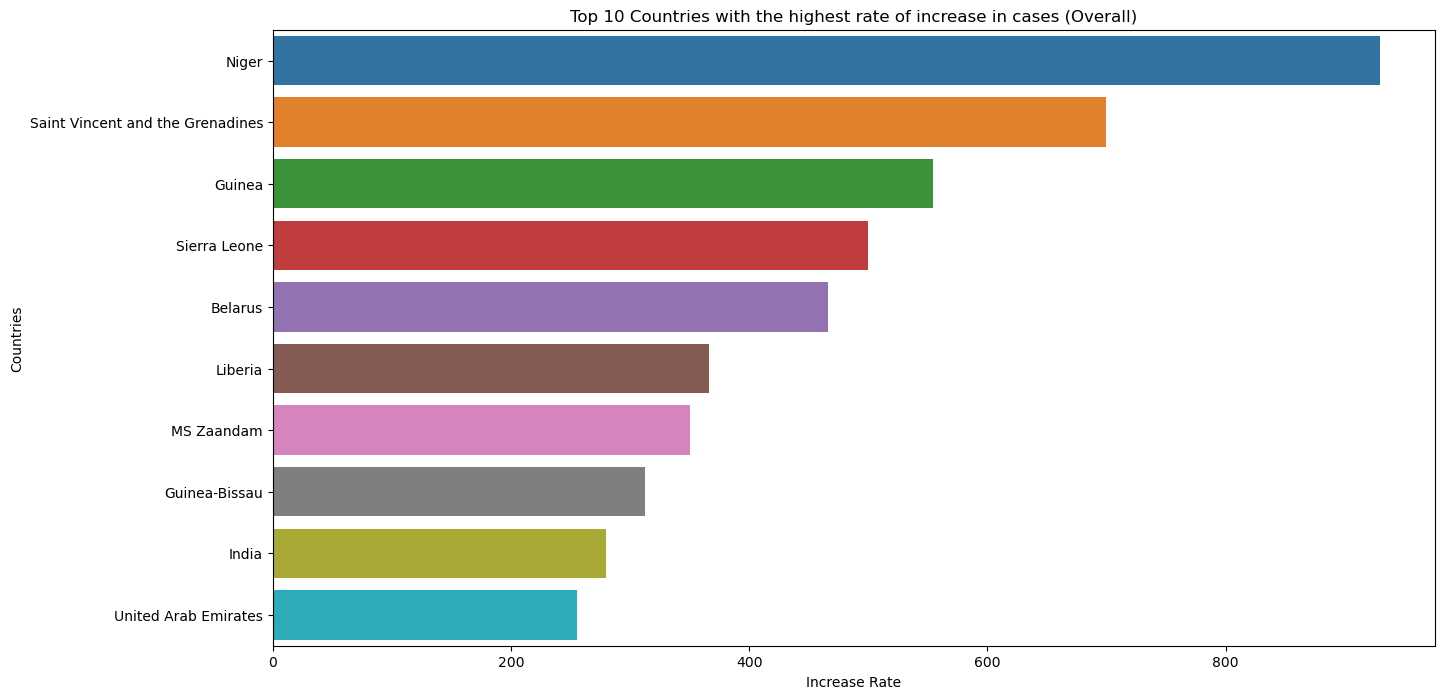

In [211]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate_overall)
plt.title('Top 10 Countries with the highest rate of increase in cases (Overall)')
plt.show()

In [212]:
april = covid_data[covid_data['ObservationDate'] == '04/07/2020']
us_cities_april = april[april['Country/Region'] == 'US'][['Province/State','Confirmed']].sort_values(by = 'Confirmed', ascending = False).head(10)

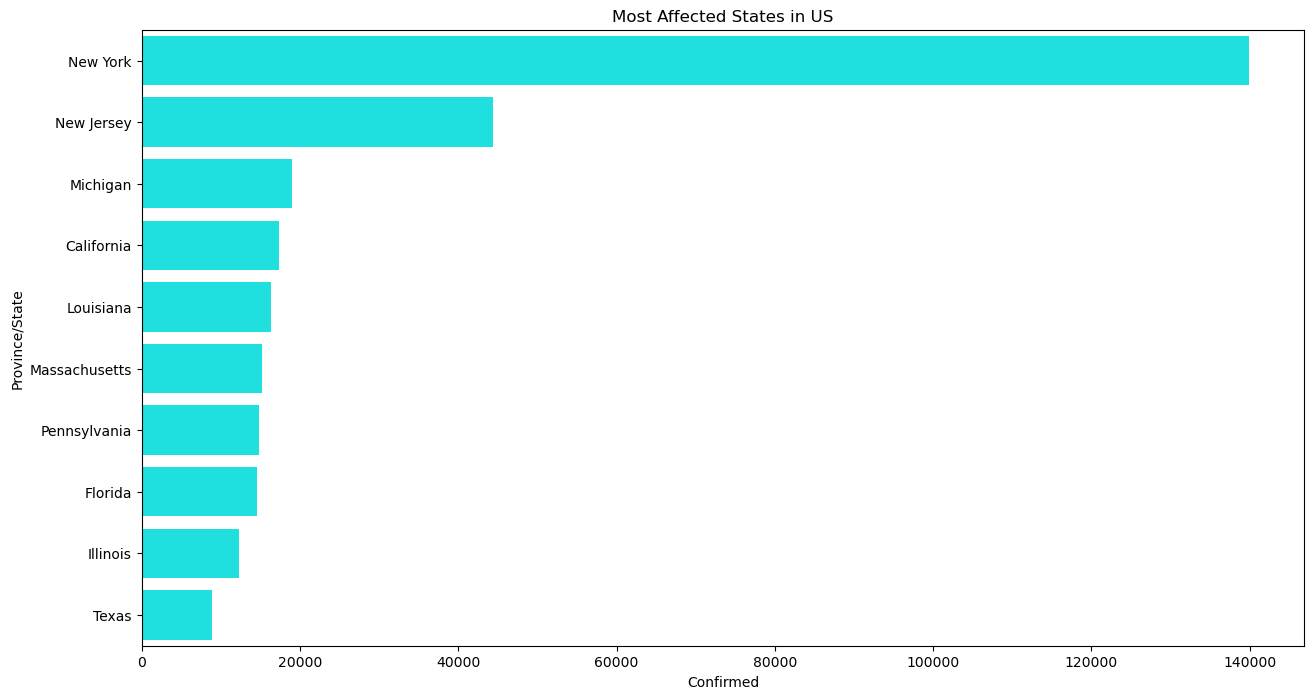

In [213]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Confirmed', y = 'Province/State', data = us_cities_april, color = 'cyan')
plt.title('Most Affected States in US')
plt.show()

In [214]:
us_dataset = covid_data[covid_data['Country/Region'] == 'US']
#Dropping these four days as cases were taken for Counties as opposed to the other days where cases were taken for States
us_dataset = us_dataset[(us_dataset['ObservationDate'] != '2020-03-06') & (us_dataset['ObservationDate'] != '2020-03-07') & (us_dataset['ObservationDate'] != '2020-03-08') & (us_dataset['ObservationDate'] != '2020-03-09')]

In [215]:
number_of_cities = us_dataset.groupby(['ObservationDate']).size()


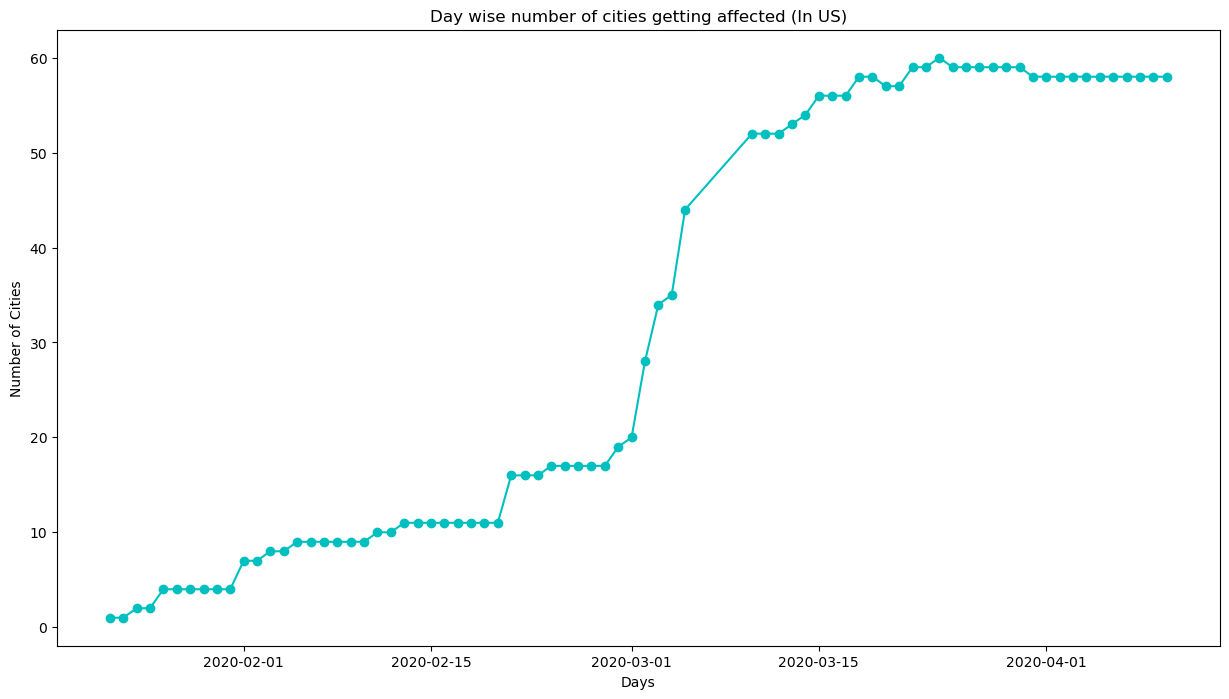

In [216]:
plt.figure(figsize = (15,8))
plt.plot(number_of_cities, color = 'c', marker = 'o')
plt.title('Day wise number of cities getting affected (In US)')
plt.xlabel('Days')
plt.ylabel('Number of Cities')
plt.show()

In [217]:
fourth_month_recovery = covid_data[covid_data['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Recovered'].sum().sort_values(ascending = False)

In [218]:
for x in fourth_month_recovery.index.tolist():
    ratio = (fourth_month_recovery[x]/fourth_month_total[x]) * 100
    fourth_month_recovery[x] = ratio   
fourth_month_recovery = fourth_month_recovery.sort_values(ascending = False).head(10) 

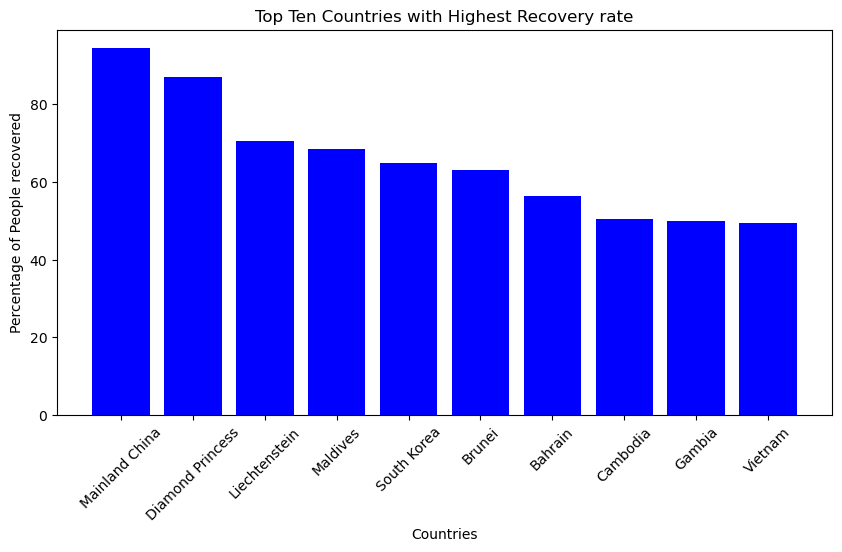

In [219]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Countries')
plt.ylabel('Percentage of People recovered')
plt.title('Top Ten Countries with Highest Recovery rate')
plt.bar(fourth_month_recovery.index.tolist(), fourth_month_recovery.tolist(),color = 'b',)
plt.show()

In [220]:
fourth_month_deaths = covid_data[covid_data['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Deaths'].sum().sort_values(ascending = False)

In [221]:
for x in fourth_month_deaths.index.tolist():
    ratio = (fourth_month_deaths[x]/fourth_month_total[x]) * 100
    fourth_month_deaths[x] = ratio   

In [222]:
fourth_month_deaths = fourth_month_deaths.sort_values(ascending= False).head(10)

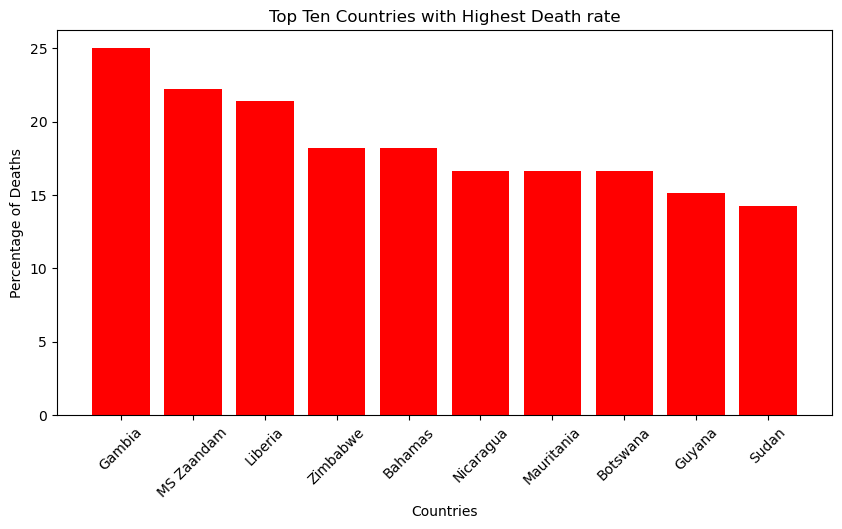

In [223]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Countries')
plt.ylabel('Percentage of Deaths')
plt.title('Top Ten Countries with Highest Death rate')
plt.bar(fourth_month_deaths.index.tolist(), fourth_month_deaths.tolist(),color = 'r',)
plt.show()


In [224]:
ind_confirmed = covid_data[covid_data['Country/Region'] == 'India'].groupby(['ObservationDate'])['Confirmed'].sum().tolist()
ind_recovered = covid_data[covid_data['Country/Region'] == 'India'].groupby(['ObservationDate'])['Recovered'].sum().tolist()
ind_deaths = covid_data[covid_data['Country/Region'] == 'India'].groupby(['ObservationDate'])['Deaths'].sum().tolist()


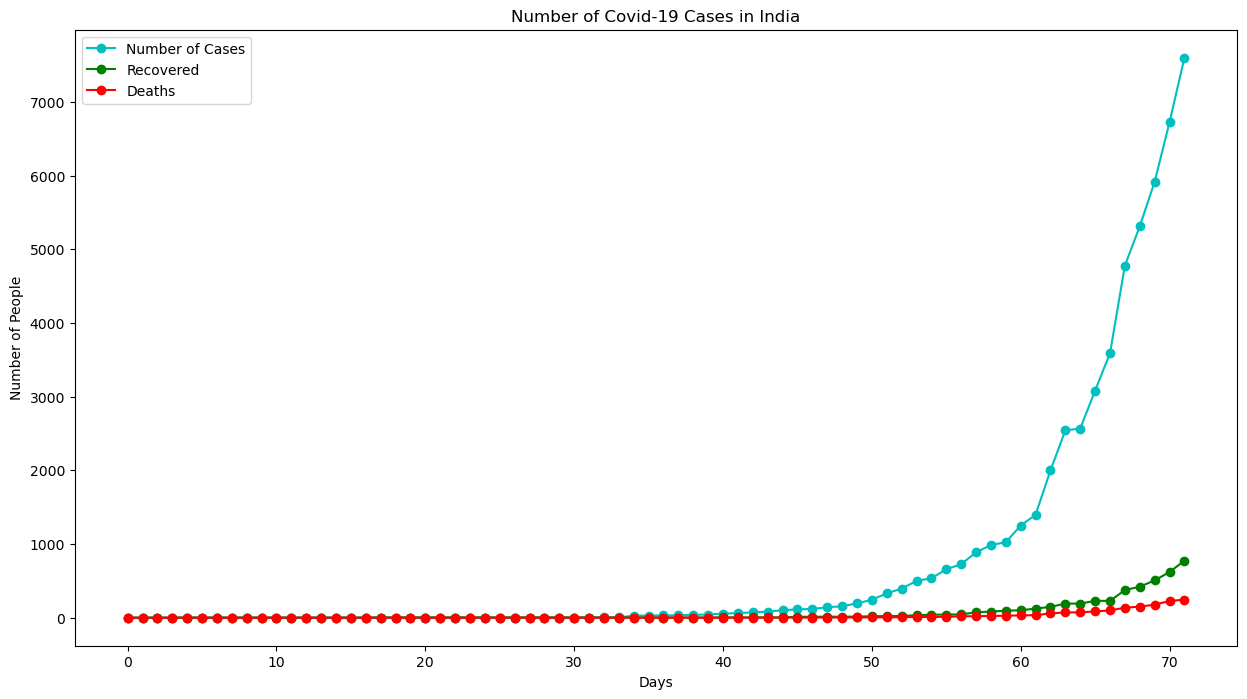

In [225]:
plt.figure(figsize = (15,8))
plt.plot(ind_confirmed, color = 'c', marker = 'o', label = 'Number of Cases')
plt.plot(ind_recovered, color = 'g', marker = 'o', label = 'Recovered')
plt.plot(ind_deaths, color = 'r', marker = 'o', label = 'Deaths')
plt.title('Number of Covid-19 Cases in India')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.legend()
plt.show()


In [226]:
dataset_rnn = covid_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})


In [227]:
dataset_rnn


,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
2020-01-27,2927.0,61.0,82.0
2020-01-28,5578.0,107.0,131.0
2020-01-29,6165.0,126.0,133.0
2020-01-30,8235.0,143.0,171.0


In [228]:
dataset_rnn.shape


(80, 3)

In [229]:
training_set = dataset_rnn.iloc[:,0:1]
#Date Preprocessing
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
#Creating data structure with 45 timesteps 
X_train = []
y_train = []
for i in range(45, 60):
    X_train.append(training_set_scaled[i-45:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)   

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()

#Add first LSTM layer and Dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding third layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mse')


#Training the model
#Taking a small batch size because the number of data points to train on is limited
regressor.fit(X_train, y_train, epochs = 50, batch_size = 5)


[[0.00000000e+00]
 [5.79482534e-05]
 [2.28245161e-04]
 [5.22125589e-04]
 [9.24215511e-04]
 [1.40258426e-03]
 [2.97014364e-03]
 [3.31724185e-03]
 [4.54125088e-03]
 [5.54056259e-03]
 [6.78999789e-03]
 [9.59812295e-03]
 [1.14276321e-02]
 [1.37993713e-02]
 [1.60132311e-02]
 [1.78947754e-02]
 [2.00081128e-02]
 [2.16217942e-02]
 [2.34134596e-02]
 [2.49579580e-02]
 [2.61642277e-02]
 [2.64119861e-02]
 [3.53691304e-02]
 [3.92226892e-02]
 [4.04910464e-02]
 [4.17883777e-02]
 [4.29910996e-02]
 [4.41015774e-02]
 [4.43990057e-02]
 [4.47289559e-02]
 [4.51097587e-02]
 [4.61480968e-02]
 [4.63763420e-02]
 [4.67222576e-02]
 [4.72219134e-02]
 [4.78025786e-02]
 [4.86061671e-02]
 [4.94150774e-02]
 [5.05320596e-02]
 [5.19263655e-02]
 [5.30723218e-02]
 [5.45712894e-02]
 [5.59194732e-02]
 [5.75526679e-02]
 [5.98670502e-02]
 [6.22535721e-02]
 [6.46182156e-02]
 [6.68338493e-02]
 [6.97903929e-02]
 [7.40968942e-02]
 [7.55621572e-02]
 [8.55257089e-02]
 [9.19745217e-02]
 [9.86846929e-02]
 [1.07021554e-01]
 [1.162589

In [230]:
#Prediction and visualization
real_confirmed_cases = dataset_rnn.iloc[57:77,0:1]
#print(real_confirmed_cases)
X_test = []

for i in range(57,77):
    X_test.append(training_set_scaled[i-45:i, 0])
X_test = np.array(X_test)
#print(training_set_scaled)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)
print(predicted_confirmed_cases)





1/1 [==============================] - 2s 2s/step
[[ 259576.72]
 [ 277285.25]
 [ 296622.03]
 [ 318003.84]
 [ 341922.4 ]
 [ 368865.56]
 [ 399463.84]
 [ 434326.44]
 [ 474213.94]
 [ 519986.  ]
 [ 572644.25]
 [ 631823.2 ]
 [ 698967.06]
 [ 775024.9 ]
 [ 860337.8 ]
 [ 954936.3 ]
 [1058419.5 ]
 [1170020.2 ]
 [1288259.  ]
 [1411087.5 ]]


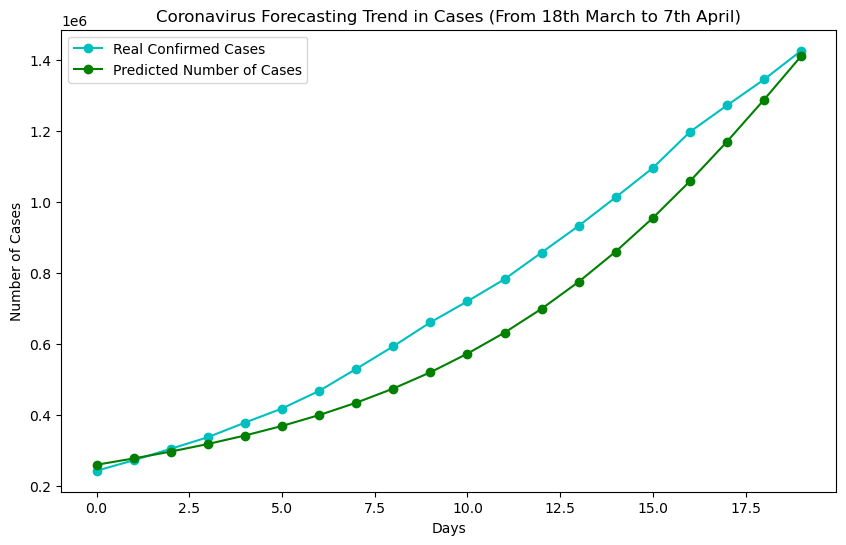

In [231]:
# from matplotlib import pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(real_confirmed_cases.values, color='c',marker = 'o', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g',marker = 'o', label = 'Predicted Number of Cases')
plt.title('Coronavirus Forecasting Trend in Cases (From 18th March to 7th April)')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()



In [252]:
# from keras.metrics.metrics import mean_squared_error
# from math import sqrt



# a=np.array(predicted_confirmed_cases)
# b=np.array(real_confirmed_cases)

predicted=np.array(predicted_confirmed_cases)
predicted=predicted.flatten()

print(predicted)
print(real_confirmed_cases)

lstm_rmse = sqrt(mean_squared_error(real_confirmed_cases['Confirmed'],predicted))
print(lstm_rmse)

[ 259576.72  277285.25  296622.03  318003.84  341922.4   368865.56
  399463.84  434326.44  474213.94  519986.    572644.25  631823.2
  698967.06  775024.9   860337.8   954936.3  1058419.5  1170020.2
 1288259.   1411087.5 ]
                 Confirmed
ObservationDate           
2020-03-19        242713.0
2020-03-20        272167.0
2020-03-21        304549.0
2020-03-22        337122.0
2020-03-23        378287.0
2020-03-24        417966.0
2020-03-25        467594.0
2020-03-26        529591.0
2020-03-27        593291.0
2020-03-28        660693.0
2020-03-29        720140.0
2020-03-30        782389.0
2020-03-31        857487.0
2020-04-01        932605.0
2020-04-02       1013303.0
2020-04-03       1095917.0
2020-04-04       1197408.0
2020-04-05       1272115.0
2020-04-06       1345101.0
2020-04-07       1426096.0
105599.11436910956


In [234]:

data_arima = pd.read_csv(r'covid_19_data.csv')

data_arima['ObservationDate'] = pd.to_datetime(data_arima['ObservationDate'])
data_arima['Last Update'] = pd.to_datetime(data_arima['Last Update'])

data_arima.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13845,13846,2020-04-10,Wyoming,US,2020-04-10 23:01:43,239.0,0.0,0.0
13846,13847,2020-04-10,Xinjiang,Mainland China,2020-04-10 23:01:43,76.0,3.0,73.0
13847,13848,2020-04-10,Yukon,Canada,2020-04-10 23:01:43,8.0,0.0,0.0
13848,13849,2020-04-10,Yunnan,Mainland China,2020-04-10 23:01:43,184.0,2.0,173.0
13849,13850,2020-04-10,Zhejiang,Mainland China,2020-04-10 23:01:43,1267.0,1.0,1235.0


In [235]:
covid_data = data_arima.groupby(['ObservationDate'])['Confirmed'].sum()


In [236]:

warnings.filterwarnings("ignore")
arima=auto_arima(covid_data, trace=True, suppress_warnings=True)
arima.summary()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1576.579, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1576.362, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1574.906, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1575.045, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1576.795, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1576.939, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1578.807, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1571.414, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1574.776, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1572.470, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1573.447, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1571.991, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1574.535, Time=0.03 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 0.343 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -782.707
Date:                Tue, 29 Nov 2022   AIC                           1571.414
Time:                        00:05:46   BIC                           1578.484
Sample:                             0   HQIC                          1574.244
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1537.4612    681.430      2.256      0.024     201.884    2873.039
ar.L1         -0.2647      0.059     -4.495      0.000      -0.380      -0.149
sigma2      3.081e+07      0.037   8.28e+08      0.000    3.08e+07    3.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                68.28
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               5.15   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.22e+24. Standard errors may be unstable.
"""

In [237]:


#creating training and testing sets

train=covid_data.iloc[:57]
test=covid_data.iloc[57:77]
print(test)



ObservationDate
2020-03-19     242713.0
2020-03-20     272167.0
2020-03-21     304549.0
2020-03-22     337122.0
2020-03-23     378287.0
2020-03-24     417966.0
2020-03-25     467594.0
2020-03-26     529591.0
2020-03-27     593291.0
2020-03-28     660693.0
2020-03-29     720140.0
2020-03-30     782389.0
2020-03-31     857487.0
2020-04-01     932605.0
2020-04-02    1013303.0
2020-04-03    1095917.0
2020-04-04    1197408.0
2020-04-05    1272115.0
2020-04-06    1345101.0
2020-04-07    1426096.0
Name: Confirmed, dtype: float64


In [238]:


#training the model with the recommended p,d,q =>(1,2,0)
model=sm.tsa.arima.ARIMA(train,order=(1,2,0)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                   57
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -518.786
Date:                Tue, 29 Nov 2022   AIC                           1041.571
Time:                        00:05:46   BIC                           1045.586
Sample:                    01-22-2020   HQIC                          1043.124
                         - 03-18-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4523      0.097     -4.685      0.000      -0.641      -0.263
sigma2      9.294e+06   7.39e+05     12.579      0.000    7.85e+06    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):               301.82
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):              13.63   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2020-03-19    231700.953691
2020-03-20    248921.547386
2020-03-21    265945.572059
2020-03-22    283058.496465
2020-03-23    300131.215337
2020-03-24    317222.117447
2020-03-25    334304.796059
2020-03-26    351391.193806
2020-03-27    368475.909547
2020-03-28    385561.385987
2020-03-29    402646.518396
2020-03-30    419731.806396
2020-03-31    436817.024029
2020-04-01    453902.273485
2020-04-02    470987.508549
2020-04-03    488072.750122
2020-04-04    505157.988752
2020-04-05    522243.228713
2020-04-06    539328.468071
2020-04-07    556413.707702
Freq: D, Name: predicted_mean, dtype: float64


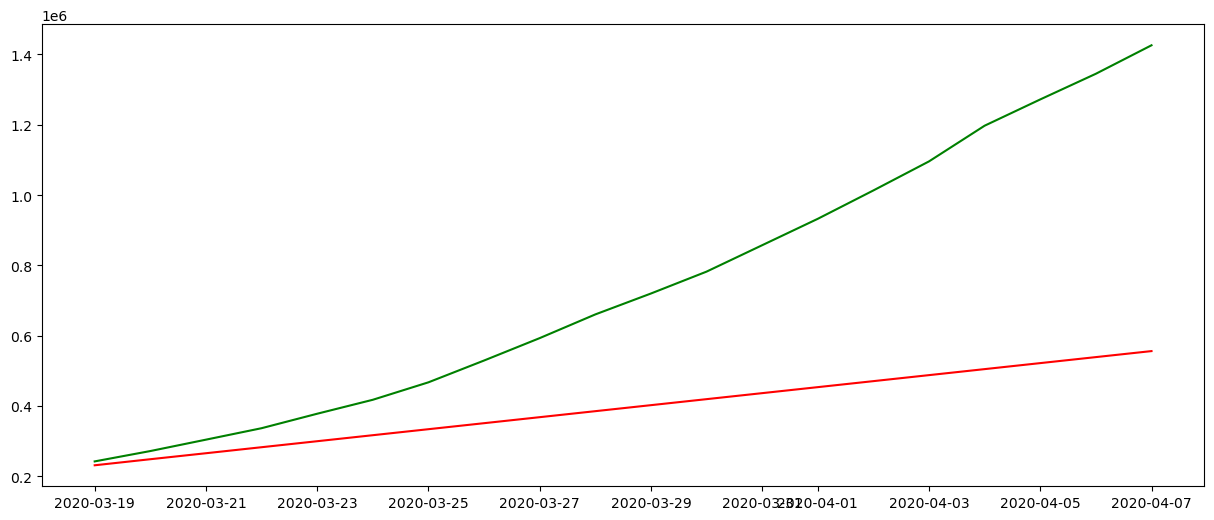

In [239]:

#predicting the no of cases worldwide for the month of may and plotting the original values against the forecasted values.
prediction=model.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')
pyplot.figure(figsize = (15,6))
pyplot.plot(prediction, color ='red',label = 'Predicted')
pyplot.plot(test,color='green', label = 'Test')
print(prediction)


In [250]:
#calculating the root sqared mean error and mean to analyze the accuracy of the model
arima_rmse=sqrt(mean_squared_error(test,prediction))
print(arima_rmse)
print(test.mean())


444198.7050376852
742326.7


In [259]:
dataset_rnn["Days Since"]=dataset_rnn.index-dataset_rnn.index.min()
train_ml=dataset_rnn.iloc[:57]
valid_ml=dataset_rnn.iloc[57:77]

svm=SVR(C=1,degree=12,kernel='poly',epsilon=0.02)
svm.fit(np.array(dataset_rnn["Days Since"]).reshape(-1,1),np.array(dataset_rnn["Confirmed"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

model_scores = []
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
svm_rmse = np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm))
print(" Root Mean Squared Error for Support Vectore Machine: ",svm_rmse)

 Root Mean Squared Error for Support Vectore Machine:  261286.6293455396


In [242]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(dataset_rnn["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=dataset_rnn.index, y=dataset_rnn["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=dataset_rnn.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [269]:
from tabulate import tabulate
rmse_table = [['LSTM',lstm_rmse], ['ARIMA',arima_rmse], ['SVM', svm_rmse]]
head=['MODEL','RMSE VALUE']
print(tabulate(rmse_table, headers=head, tablefmt="fancy_grid"))

╒═════════╤══════════════╕
│ MODEL   │   RMSE VALUE │
╞═════════╪══════════════╡
│ LSTM    │       105599 │
├─────────┼──────────────┤
│ ARIMA   │       444199 │
├─────────┼──────────────┤
│ SVM     │       261287 │
╘═════════╧══════════════╛
